In [1]:
import json
from os import path
from collections import defaultdict

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from compounds_research import settings
from compounds_research import utils

In [2]:
def load_data(currency):
    filepath = path.join(settings.DATA_PATH, "aave", f"{currency}-deposits.json")
    with open(filepath) as f:
        return json.load(f)

In [3]:
def make_df(items):
    df = pd.DataFrame(items)
    df["amount"] = pd.to_numeric(df["amount"])
    return df
    
def group_by_user(df):
    return df[["user", "amount"]].groupby(by="user").sum()

In [4]:
def compute_stats(currency, skip_count=None, ticks_interval=None):
    print(f"stats for {currency}")
    data = load_data(currency)
    deposits = make_df(data["deposits"])
    redeems = make_df(data["redeems"])
    deposits_by_user = group_by_user(deposits)
    redeem_by_user = group_by_user(redeems)
    locked_by_user = (deposits_by_user - redeem_by_user).sort_values(by="amount", ascending=False).amount
    non_zero_user = locked_by_user[locked_by_user > 0]
    print("total users: ", len(locked_by_user))
    print("total non-zero: ", len(non_zero_user))
    return utils.plot_cumulative_hist(non_zero_user, skip_count=skip_count, ticks_interval=ticks_interval)
    

stats for DAI
total users:  2441
total non-zero:  303


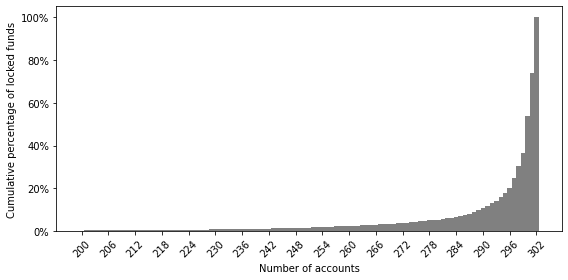

In [5]:
compute_stats("DAI", skip_count=200)

stats for ETH
total users:  2326
total non-zero:  328


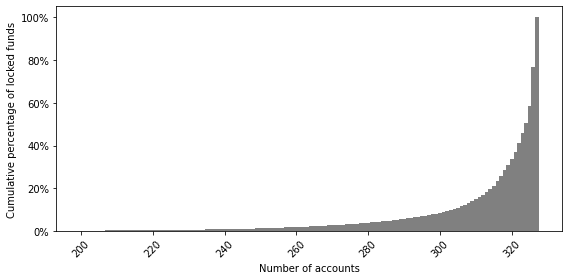

In [6]:
compute_stats("ETH", skip_count=200, ticks_interval=20)

stats for USDC
total users:  1210
total non-zero:  175


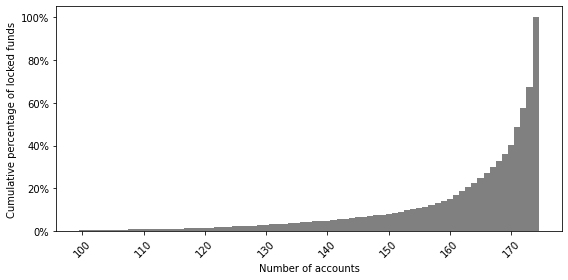

In [7]:
compute_stats("USDC", skip_count=100, ticks_interval=10)